<a href="https://colab.research.google.com/github/AdrianaLecourieux/Long_project/blob/main/SHAP_proportion_black_white_pixel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import data

In [ ]:
!pip  install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 13.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd       
import numpy as np
import os
import keras
import tensorflow as tf
tf.compat.v1.disable_v2_behavior() 
import cv2 # for read image

# For data visualisation
from matplotlib import pyplot as plt # data visualisation

# For building models
from tensorflow.keras.models import Sequential # quick and easy
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# For evaluating model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import classification_report

# For confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# For saving model
from tensorflow.keras.models import load_model

# For model interpretation
import shap


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shape_model = load_model('../content/drive/MyDrive/long_project/saved_models/shape_model')

# 2. Perform SHAP

In [ ]:
spe_cell = '/content/drive/MyDrive/long_project/shape_data/specific_cells_copy_paste/specific_cells_1001_330_5.png'

In [ ]:
img = cv2.imread(spe_cell)
img2 = np.expand_dims(img/255, 0)

In [ ]:
img2

In [ ]:
# select a set of background examples to take an expectation over
background =img2

In [ ]:
# explain predictions of the model on four images
e = shap.DeepExplainer(shape_model, background)

In [ ]:
spe_test = '/content/drive/MyDrive/long_project/tumor_data/Tumor_Ag_specifique_PB2_crop/Tumor_Ag_specifique_PB2_0_409_170.png'

In [ ]:
img_test = cv2.imread(spe_test)
img2_test = np.expand_dims((img_test).astype(np.uint8), 0)

In [ ]:
shap_values = e.shap_values(img2_test)

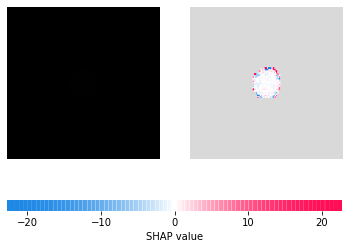

In [ ]:
shap.image_plot(shap_values, -img2_test)

In [ ]:
DIR = '/content/drive/MyDrive/long_project/shape_data/specific_cells_copy_paste'

In [ ]:
X = []
files = [f for f in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, f))]
for file in files:
  path_to_image = os.path.join(DIR, file)
  X.append(path_to_image)

In [ ]:
DIR2 = '/content/drive/MyDrive/long_project/shape_data/non_specific_cells_copy_paste'

In [ ]:
len(X)

1136

In [ ]:
files = [f for f in os.listdir(DIR2) if os.path.isfile(os.path.join(DIR2, f))]
for file in files:
  path_to_image = os.path.join(DIR2, file)
  X.append(path_to_image)

In [ ]:
len(X)

2571

In [ ]:
new_X = []
for file in X:
  img = cv2.imread(file)
  img2 = np.expand_dims(img, 0)
  new_X.append(img2)


In [ ]:
new_background = new_X

In [ ]:
e = shap.DeepExplainer(shape_model, new_background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
image_test = '/content/drive/MyDrive/long_project/tumor_data/Tumor_Ag_specifique_PB2_crop/Tumor_Ag_specifique_PB2_100_239_266.png'

In [ ]:
image_test

'/content/drive/MyDrive/long_project/tumor_data/Tumor_Ag_specifique_PB2_crop/Tumor_Ag_specifique_PB2_100_239_266.png'

In [ ]:
img_test = cv2.imread(image_test)
img2_test = np.expand_dims(img_test/255, 0)

In [ ]:
img2_test

In [ ]:
shap_values = e.shap_values(img2_test)

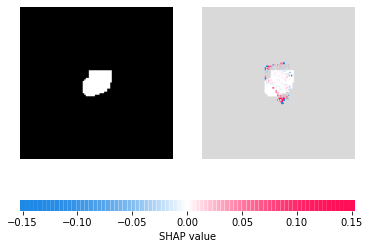

In [ ]:
shap.image_plot(shap_values,img2_test)

# 3 Proportion black/white pixel

Specific

In [ ]:
image_train = '/content/drive/MyDrive/long_project/shape_data/specific_cells_copy_paste/specific_cells_0_51_5.png'

In [ ]:
img_train = cv2.imread(image_train)
img2_train = np.expand_dims(img_train, 0)

In [ ]:
number_of_white_pix = np.sum(img2_train == 255)      

number_of_black_pix = np.sum(img2_train == 0)         

In [ ]:
print(number_of_white_pix, number_of_black_pix)

1236 28764


In [ ]:
number_of_black_pix/number_of_white_pix

23.271844660194176

Loop

In [ ]:
dir = '/content/drive/MyDrive/long_project/shape_data/specific_cells_copy_paste'

In [ ]:
X = []
files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
for file in files:
  path_to_image = os.path.join(dir, file)
  X.append(path_to_image)

In [ ]:
keep_value = []
for file in X:
  img = cv2.imread(file)
  img2 = np.expand_dims(img, 0)
  number_of_white_pix_test = np.sum(img2 == 255)    
  number_of_black_pix_test = np.sum(img2 == 0)
  keep_value.append(number_of_black_pix_test/number_of_white_pix_test)  
 

In [ ]:
sum(keep_value)/len(keep_value)

34.3166102838212

Non-specific

In [ ]:
dir = '/content/drive/MyDrive/long_project/shape_data/non_specific_cells_copy_paste'

In [ ]:
X = []
files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
for file in files:
  path_to_image = os.path.join(dir, file)
  X.append(path_to_image)

In [ ]:
keep_value = []
for file in X:
  img = cv2.imread(file)
  img2 = np.expand_dims(img, 0)
  number_of_white_pix_test = np.sum(img2 == 255)    
  number_of_black_pix_test = np.sum(img2 == 0)
  keep_value.append(number_of_black_pix_test/number_of_white_pix_test)  
 

In [ ]:
sum(keep_value)/len(keep_value)

34.40866705118158

Tumors

In [ ]:
image_test = '/content/drive/MyDrive/long_project/tumor_data/Tumor_Ag_specifique_PB2_crop/Tumor_Ag_specifique_PB2_0_409_170.png'

In [ ]:
img_test = cv2.imread(image_test)
img2_test = np.expand_dims(img_test, 0)  

In [ ]:
number_of_white_pix_test = np.sum(img2_test == 255)      

number_of_black_pix_test = np.sum(img2_test == 0)  

In [ ]:
print(number_of_white_pix_test, number_of_black_pix_test)

1128 28872


In [ ]:
number_of_black_pix_test/number_of_white_pix_test

31.78688524590164

Specific

In [ ]:
dir = '/content/drive/MyDrive/long_project/tumor_data/Tumor_Ag_specifique_PB2_crop/'

In [ ]:
X = []
files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
for file in files:
  path_to_image = os.path.join(dir, file)
  X.append(path_to_image)

In [ ]:
keep_value = []
for file in X:
  img = cv2.imread(file)
  img2 = np.expand_dims(img, 0)
  number_of_white_pix_test = np.sum(img2 == 255)    
  number_of_black_pix_test = np.sum(img2 == 0)
  keep_value.append(number_of_black_pix_test/number_of_white_pix_test)  
 

In [ ]:
sum(keep_value)/len(keep_value)

34.93871480927672

Non-specific

In [ ]:
dir = '/content/drive/MyDrive/long_project/tumor_data/Tumor_non_specifique_PB2_crop'

In [ ]:
X = []
files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
for file in files:
  path_to_image = os.path.join(dir, file)
  X.append(path_to_image)

In [ ]:
keep_value = []
for file in X:
  img = cv2.imread(file)
  img2 = np.expand_dims(img, 0)
  number_of_white_pix_test = np.sum(img2 == 255)    
  number_of_black_pix_test = np.sum(img2 == 0)
  keep_value.append(number_of_black_pix_test/number_of_white_pix_test)  
 

In [ ]:
sum(keep_value)/len(keep_value)

27.98778414878786